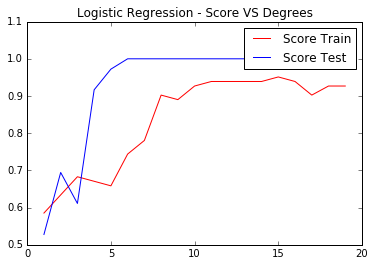

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model
import math
import pandas as pd

def nCr(n,r):
    f = math.factorial
    return int(f(n) / f(r) / f(n-r))

def plot_boundaries(X_train, X_test, y_train, y_test, score, probability_func, h, ax = None):
    X = np.vstack((X_test, X_train))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    Z = probability_func(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, 50, cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6, s=200)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
    

    
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

''' 
Utilizando las siguientes funciones/paquetes resolver los siguientes problemas de clasificación en **problema_2.py**:

**genfromtxt** de **numpy** para leer los dos datasets:
- ./datasets/student_admission.txt
- ./datasets/chip_tests.txt

**train_test_split** de **sklearn** para dividir entre test set y train set. Recomendamos un 40% de datos para test set

**GaussianNB** de **sklearn** como modelo de ML.

Y la función **plot_boundaries(X_train, X_test, y_train, y_test, score, predict_proba, ax=ax, h=h)** incluida en problema_2.py para graficar los resultados. X_train es un np.array con los features de entrada, y_train es la etiqueta. Lo mismo con X_test e y_test, Score es el 'accuracy' del modelo, predict_proba es la función que dada una entrada de la probabilidad de clasificar correcto y h es el paso para la grafica del 'boundary' 
'''

def get_polynimial_set(X, degree = 12):
    # Recibe el dataset X de numero_de_muestras x features  y devuelve una matriz con todas las combinaciones 
    # De los productos del grado indicado en degree
    k = 2
    n = degree + k
    pos = 0
    X_mat = np.zeros((X.shape[0],nCr(n,k)))
    for i in range(degree + 1):
        for j in range(i+1):
            X_mat[:,pos] = (X[:,0]**(i-j))*X[:,1]**j
            pos = pos + 1
    return X_mat

def train_and_plot(X, y, h=1):
    X_train, X_test = train_test_split(X, test_size=0.3)
    y_train, y_test = train_test_split(y, test_size=0.3)
    
    clf=linear_model.LogisticRegression(C=1000000)
    
    degrees = []
    scores = []
    
    results = pd.DataFrame(columns=['Degrees','Score_Train','Score_Test'])
    
    for degree in range(1, 20):
        #Train
        X_train_nuevo = get_polynimial_set(X_train, degree)
        y_pred_train = clf.fit(X_train_nuevo,y_train)
        score_train = y_pred_train.score(X_train_nuevo, y_train)
        #accuracy_train = accuracy_score(y_train,clf.predict(X_train_nuevo))
        
        #Test
        X_test_nuevo = get_polynimial_set(X_test, degree)
        y_pred_test = clf.fit(X_test_nuevo,y_test)
        score_test = y_pred_test.score(X_test_nuevo, y_test)
        #accuracy_test = accuracy_score(y_test,clf.predict(X_test_nuevo))
        results = results.append({'Degrees':degree, 'Score_Train':score_train, 'Score_Test':score_test}, ignore_index=True)
    
    %matplotlib inline
    plt.plot('Degrees', 'Score_Train', data=results, color='Red', label='Score Train')
    plt.plot('Degrees', 'Score_Test', data=results, color='Blue', label='Score Test')
    plt.title('Logistic Regression - Score VS Degrees')
    plt.legend()
    plt.show()
    
    return


#Leo los datos del txt
datos = np.genfromtxt('C:\\ITBA\\Lab Machine Learning\\itba-ml-proyecto\\Ejercicios Python\\Logistic Regression\\chip_tests.txt', delimiter=',')

features = datos[:,0:2]
labels = np.ravel(datos[:,2:3].astype(int))

#Llamo a la funcion que hace todo
train_and_plot(features, labels, h=1)